In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns




In [29]:
#read dataset
df=pd.read_csv('/home/dell/Documents/datasets/diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
x = df[feature_cols] # Features
y = df.Outcome # Target variable

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=70,random_state=101)
logit=LogisticRegression(max_iter=30000)
logit.fit(x_train,y_train)
accuracy=logit.score(x_test,y_test)
accuracy


0.7857142857142857

In [43]:
y_pred=logit.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0])

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[43,  6],
       [ 9, 12]])

Text(0.5,257.44,'Predicted label')

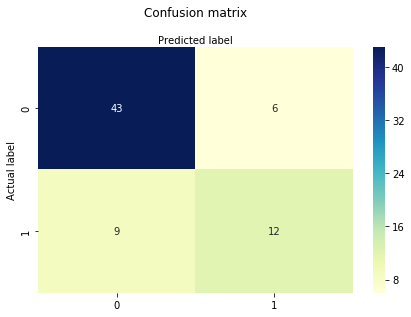

In [45]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85        49
          1       0.67      0.57      0.62        21

avg / total       0.78      0.79      0.78        70



In [47]:
from sklearn.svm import SVC#support vector machine
model=SVC(C=1E20,kernel='rbf',decision_function_shape='ovo',max_iter=50000)  #c for hard and soft margin by default 1
model.fit(x_train,y_train)

SVC(C=1e+20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=50000, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
accuracy=model.score(x_test,y_test)
accuracy

0.7

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [51]:
rf = RandomForestClassifier(n_estimators=100,max_depth = 3,random_state=101)
rf.fit(x_train, y_train)
accuracy=model.score(x_test,y_test)
accuracy

0.7

In [52]:
y_pred = rf.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0])